# Sentiment Analysis

# Importing the required libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
print("all done")

all done


# Importing dataset

In [28]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [29]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [30]:
print(df.shape)
#cutting down the shape
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


eda

In [31]:
df['Score']
# number of times each score occours
df['Score'].value_counts()
#sort index
df['Score'].value_counts().sort_index()

1     36
2     18
3     37
4     70
5    339
Name: Score, dtype: int64

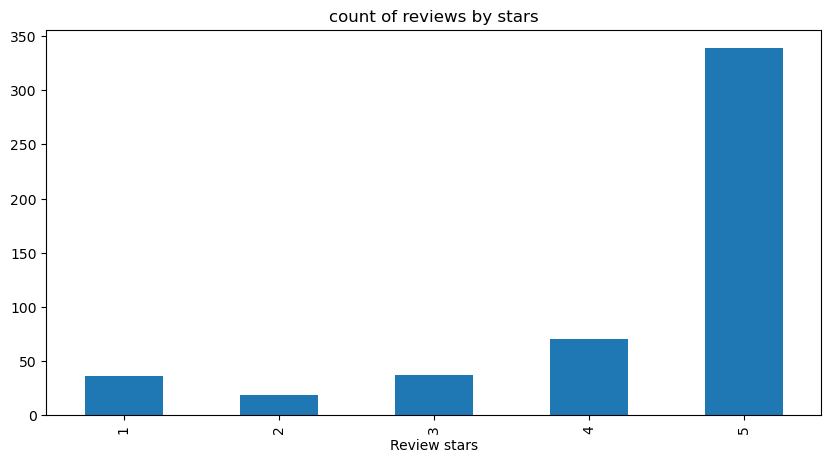

In [32]:
#potting
df['Score'].value_counts().sort_index().plot(kind='bar', title='count of reviews by stars', figsize=(10,5))
axis = df['Score'].value_counts().sort_index().plot(kind='bar', title='count of reviews by stars', figsize=(10,5))
axis.set_xlabel('Review stars')
plt.show()

# nltk

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

from tqdm.notebook import tqdm

In [34]:
result = {}

for i , row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    result[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [35]:
result
#convertin in dataframe
pd.DataFrame(result)
#flip
pd.DataFrame(result).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.079,0.853,0.068,-0.1027
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.791,0.150,0.8215
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [36]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')


In [37]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


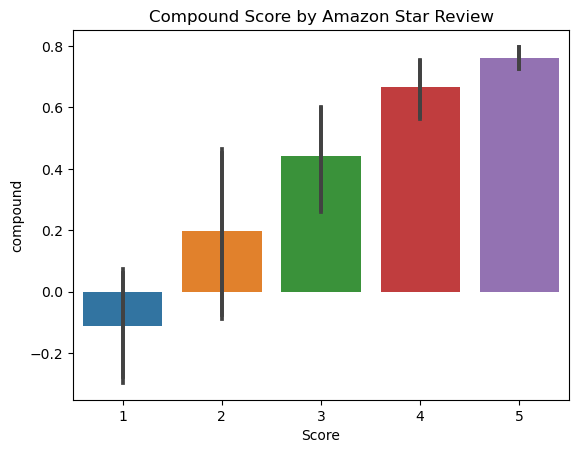

In [38]:
sns.barplot(data= vaders, x="Score", y ="compound")
ax = sns.barplot(data= vaders, x="Score", y ="compound")
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

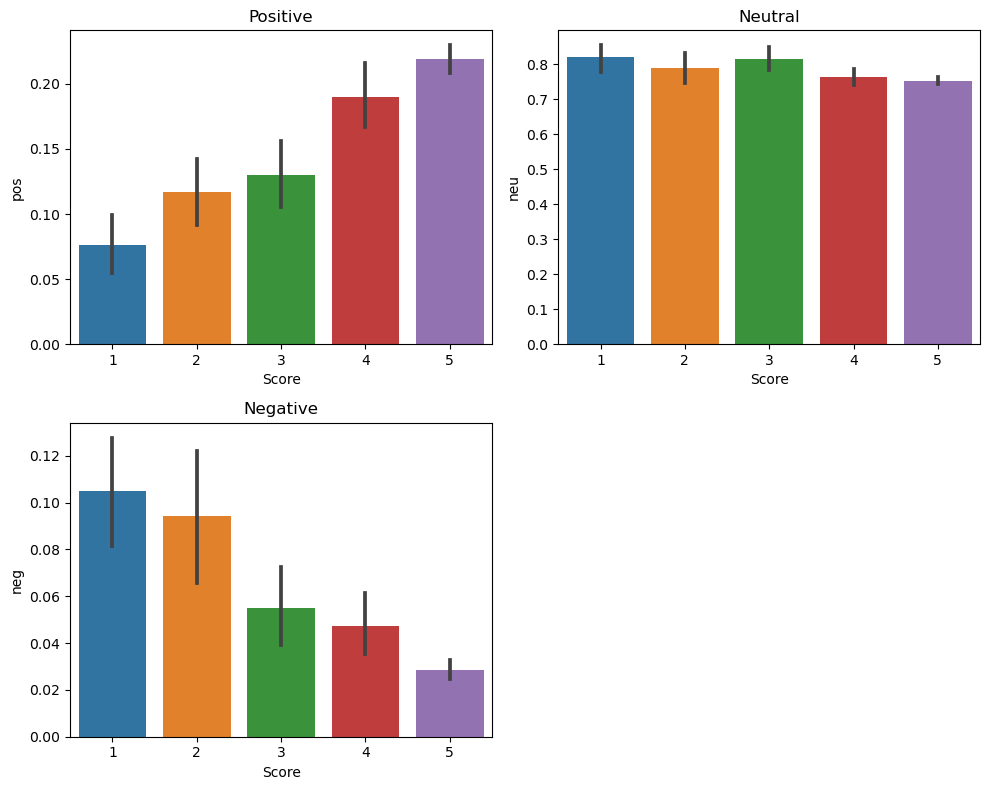

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# First subplot: Positive
sns.barplot(data=vaders, x='Score', y='pos', ax=axes[0, 0])
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('pos')
axes[0, 0].set_title('Positive')

# Second subplot: Neutral
sns.barplot(data=vaders, x='Score', y='neu', ax=axes[0, 1])
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('neu')
axes[0, 1].set_title('Neutral')

# Third subplot: Negative
sns.barplot(data=vaders, x='Score', y='neg', ax=axes[1, 0])
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('neg')
axes[1, 0].set_title('Negative')

# Remove the empty fourth subplot
fig.delaxes(axes[1, 1])

#automatic spacing adjustment
plt.tight_layout() 
plt.show()


In [49]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [50]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/conda/lib/python3.10/site-packages/transformers/utils/hub.py:417 in cached_file             │
│                                                                                                  │
│    414 │   user_agent = http_user_agent(user_agent)                                              │
│    415 │   try:                                                                                  │
│    416 │   │   # Load from URL or cache if already cached                                        │
│ ❱  417 │   │   resolved_file = hf_hub_download(                                                  │
│    418 │   │   │   path_or_repo_id,                                                              │
│    419 │   │   │   filename,                                                                     │
│    420 │   │   │   subfolder=None if len(subfolder) == 0 else subfolder,                         │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/huggingface_hub/utils/_validators.py:118 in _inner_fn    │
│                                                                                                  │
│   115 │   │   if check_use_auth_token:                                                           │
│   116 │   │   │   kwargs = smoothly_deprecate_use_auth_token(fn_name=fn.__name__, has_token=ha   │
│   117 │   │                                                                                      │
│ ❱ 118 │   │   return fn(*args, **kwargs)                                                         │
│   119 │                                                                                          │
│   120 │   return _inner_fn  # type: ignore                                                       │
│   121                                                                                            │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1291 in hf_hub_download │
│                                                                                                  │
│   1288 │   │   │   │   " and downloads online, set 'local_files_only' to False."                 │
│   1289 │   │   │   )                                                                             │
│   1290 │   │   else:                                                                             │
│ ❱ 1291 │   │   │   raise LocalEntryNotFoundError(                                                │
│   1292 │   │   │   │   "Connection error, and we cannot find the requested files in"             │
│   1293 │   │   │   │   " the disk cache. Please try again or make sure your Internet"            │
│   1294 │   │   │   │   " connection is on."                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
LocalEntryNotFoundError: Connection error, and we cannot find the requested files in the disk cache. Please try 
again or make sure your Internet connection is on.

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"                                   │
│ ❱ 2 tokenizer = AutoTokenizer.from_pretrained(MODEL)                                             │
│   3 model = AutoModelForSequenceClassification.from_pretrained(MODEL)                            │
│   4                        